C:\Users\anzah\AppData\Local\Temp\ipykernel_23012\241282764.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


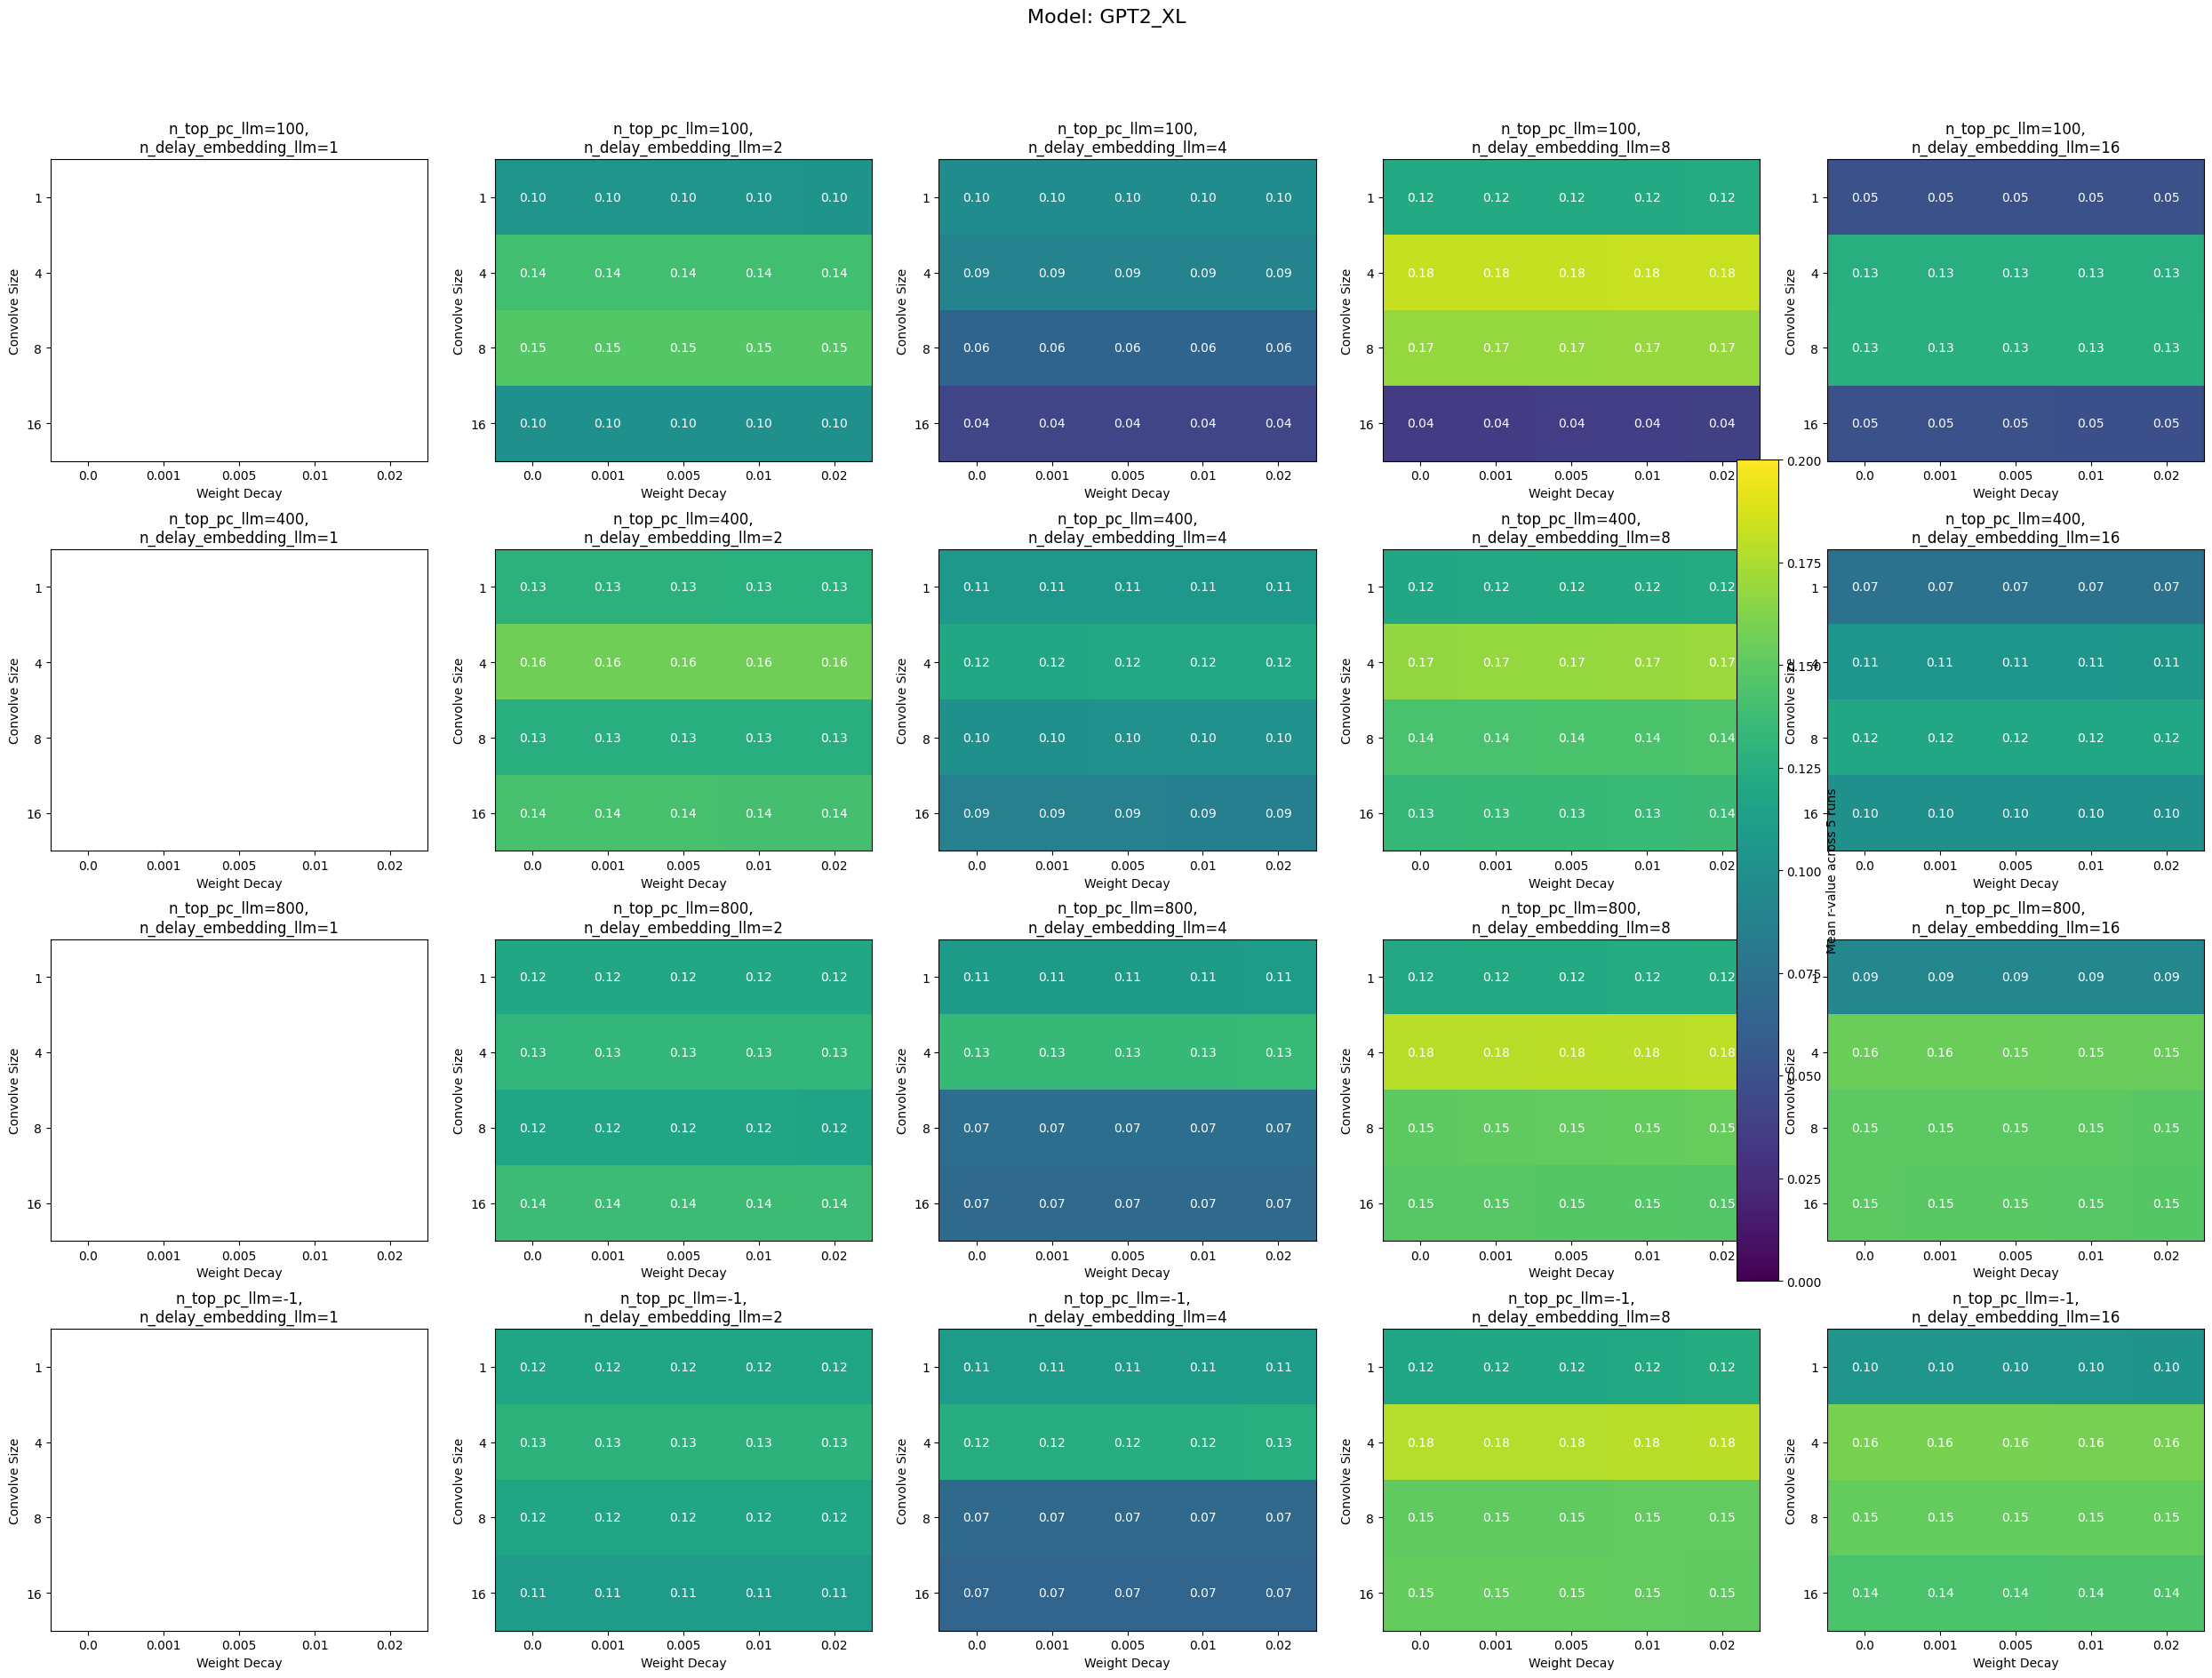

In [11]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

# Set this to 0 or 1 depending on which model you want to plot
llm_model_index = 0  # Change this to 1 for the other model

# Parameters
weight_decay_values = [0.0, 0.001, 0.005, 0.01, 0.02]
convolve_size_values = [1, 4, 8, 16]
n_top_pc_llm_values = [100, 400, 800, -1]
n_delay_embedding_llm_values = [1, 2, 4, 8, 16]
random_seeds = [0]#list(range(5))  # 0 to 4

# Function to read JSON files and extract r values
def extract_r_value(filename):
    with open(filename, 'r') as f:
        data = json.load(f)
    return data['r_value_test']

# Create a 4x5 grid of subplots
fig, axes = plt.subplots(4, 5, figsize=(25, 20))
fig.suptitle(f"Model: {'GPT2_XL' if llm_model_index == 0 else 'LLAMA_3.1_70b'}", fontsize=16)

# Iterate over n_top_pc_llm and n_delay_embedding_llm values
for i, n_top_pc_llm in enumerate(n_top_pc_llm_values):
    for j, n_delay_embedding_llm in enumerate(n_delay_embedding_llm_values):
        # Create a 2D array to store mean r values
        r_values_mean = np.zeros((len(convolve_size_values), len(weight_decay_values)))
        
        # Iterate over convolve_size and weight_decay values
        for k, convolve_size in enumerate(convolve_size_values):
            for l, weight_decay in enumerate(weight_decay_values):
                r_values_runs = []
                
                # Iterate over random seeds
                for seed in random_seeds:
                    # Construct the filename
                    filename = f"figures/data_{'gpt2_xl' if llm_model_index == 0 else 'llama70b'}_nde{n_delay_embedding_llm}_npc{n_top_pc_llm}_cs{convolve_size}_wd{weight_decay:.3f}_r{seed}_data.json"

                    # Extract r value if file exists
                    if os.path.exists(filename):
                        r_values_runs.append(extract_r_value(filename))
                
                # Calculate mean r value if we have any valid runs
                if r_values_runs:
                    r_values_mean[k, l] = np.mean(r_values_runs)
                else:
                    r_values_mean[k, l] = np.nan
        
        # Create heatmap with square boxes
        im = axes[i, j].imshow(r_values_mean, cmap='viridis', aspect='equal', vmin=0, vmax=0.2)
        
        # Add text annotations
        for k in range(len(convolve_size_values)):
            for l in range(len(weight_decay_values)):
                text = axes[i, j].text(l, k, f'{r_values_mean[k, l]:.2f}',
                                       ha="center", va="center", color="w")
        
        # Set title and labels
        axes[i, j].set_title(f'n_top_pc_llm={n_top_pc_llm},\nn_delay_embedding_llm={n_delay_embedding_llm}')
        axes[i, j].set_xticks(range(len(weight_decay_values)))
        axes[i, j].set_yticks(range(len(convolve_size_values)))
        axes[i, j].set_xticklabels(weight_decay_values)
        axes[i, j].set_yticklabels(convolve_size_values)
        axes[i, j].set_xlabel('Weight Decay')
        axes[i, j].set_ylabel('Convolve Size')

# Add a single colorbar for the entire figure
cbar = fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.6)
cbar.set_label('Mean r-value across 5 runs')

# Adjust layout and display
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [9]:
k, convolve_size = 0, 1

for l, weight_decay in enumerate(weight_decay_values):
    r_values_runs = []
    
    # Iterate over random seeds
    for seed in random_seeds:
        # Construct the filename
        filename = f"figures/data_{'gpt2_xl' if llm_model_index == 0 else 'llama70b'}_nde{n_delay_embedding_llm}_npc{n_top_pc_llm}_cs{convolve_size}_wd{weight_decay:.3f}_r{seed}_data.json"

        # Extract r value if file exists
        if os.path.exists(filename):
            print(weight_decay, seed, (extract_r_value(filename)))

0.0 0 0.10435850407129849
0.0 1 0.09996864590206703
0.0 2 0.1108417388709368
0.0 3 0.10358970018291774
0.0 4 0.10933744176466295
0.001 0 0.10433356604941676
0.001 1 0.0999473907761673
0.001 2 0.11090816981893567
0.001 3 0.10358165416226012
0.001 4 0.10936336299880554
0.005 0 0.10423328943362596
0.005 1 0.09986247222066955
0.005 2 0.11116002968606079
0.005 3 0.1035477051157043
0.005 4 0.10946550326797996
0.01 0 0.10410740244311678
0.01 1 0.09975582252503004
0.01 2 0.11144440893609994
0.01 3 0.10350132019152553
0.01 4 0.10958959976773944
0.02 0 0.10383285981356995
0.02 1 0.09951227225420772
0.02 2 0.11191998813170269
0.02 3 0.10331002223316323
0.02 4 0.1098260830196747
